<a href="https://colab.research.google.com/github/barysmar/test/blob/main/100_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins Dataset


Adelié, Gentoo a Chinstrap jsou druhy tučňáků žijící na souostroví Palmer v Antarktidě
<img src="https://www.gabemednick.com/post/penguin/featured.png">

Tento dataset obsahuje 344 dat z jejich pozorování. Konkrétně jde o délku a hloubku zobáku, délku plotví, hmotnost, pohlaví, ostrov a druh.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*WSb-Y9xb3YSx9owW7_JuMw.png">

Cílem je klasifikovat tučňáky do jednotlivých druhů na základě všech nebo části příznaků. Bylo použito kNN, decision tree a random forest.

## Code

Split the code blocks as you need them.

### Dataset - describe + load + split


<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*WSb-Y9xb3YSx9owW7_JuMw.png">




Import dataset

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hughhhh/penguins-for-classification")

print("Path to dataset files:", path)

100%|██████████| 2.85k/2.85k [00:00<00:00, 5.00MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hughhhh/penguins-for-classification/versions/1


In [109]:
# # import numpy as np

# # a = np.array([[0.2,0.4,'male','adelia'],  [0.26,0.674,'female','gento']  ])
# # print(a)
# # a[a=='male'] = 0
# # a[a=='female'] = 1
# # print(a)
# import numpy as np

# def accuracy(y_true, y_pred):
#   accuracy = np.sum(y_true == y_pred) / len(y_true)
#   return accuracy

# # Prepare data
# X, y = datasets.make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=123)

# # more preference of one class
# y[:int(3*len(y)/4)] = 1

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
# # Design a model
# clf = MyDummyClassifier()

# # 4. Train a model
# clf.fit(X_train, y_train)

# # 5. Make predictions
# predictions = clf.predict(X_test)

# # 6. Evaluate predictions
# print("Dummy classifier has accuracy", accuracy(y_test, predictions))

# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# def accuracy(y_true, y_pred):
#   accuracy = np.sum(y_true == y_pred) / len(y_true)
#   return accuracy

# # X, y = data.data, data.target

# # print(data.DESCR)



# clf = DecisionTree(max_depth=5)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# acc = accuracy(y_test, y_pred)

# print("Accuracy:", acc)
# print(accuracy_score(y_pred, y_test))
# print()
# print(confusion_matrix(y_pred, y_test))

# print(classification_report(y_pred, y_test))

Data pre-processing

In [171]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt

penguins = pd.read_csv(path+'/penguins.csv')
#penguins.head()

#Delet NaN data
penguins_data = penguins.dropna()
#print(penguins_data)

penguins_data = penguins_data.to_numpy()
#Delete '.' in data
penguins_data = penguins_data[~np.any(penguins_data == '.', axis=1)] #point = ~np.any(penguins_data == '.', axis=1)

#Drop the islands in '0' column
print(penguins_data[:,1:])
print('N_data:',len(penguins_data))

# Def X
X = penguins_data[:,1:-1]
#Change to binary anotation in
X[X=='MALE'] = 0
X[X=='FEMALE'] = 1
# print(np.where(X=='.'))
# print(type(X))
X = X.astype(float)
# print(X)
y = penguins_data[:,-1]
# print(y)
#Ghange y to numbers
y[y=='Adelie'] = 0
y[y=='Chinstrap'] = 1
y[y=='Gentoo'] = 2
y = y.astype(int)
# print(y)
#print(X,y)
print('Adelie: 0', '\t Chinstrap: 1', '\tGentoo: 2')
print(np.sum(y==0),'\t\t', np.sum(y==1),'\t\t',np.sum(y==2)) #'=',len(y)
#print(X[:,:-1])

[[39.1 18.7 181.0 3750.0 'MALE' 'Adelie']
 [39.5 17.4 186.0 3800.0 'FEMALE' 'Adelie']
 [40.3 18.0 195.0 3250.0 'FEMALE' 'Adelie']
 ...
 [50.4 15.7 222.0 5750.0 'MALE' 'Gentoo']
 [45.2 14.8 212.0 5200.0 'FEMALE' 'Gentoo']
 [49.9 16.1 213.0 5400.0 'MALE' 'Gentoo']]
N_data: 333
Adelie: 0 	 Chinstrap: 1 	Gentoo: 2
146 		 68 		 119
[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


Data set split

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13873)

In [346]:
# @title Decision tree
# class MyDummyClassifier:
#   def __init__(self):
#     pass

#   def fit(self, X, y):
#     n_samples, n_features = X.shape
#     self._classes = np.unique(y)
#     self._priors = [X[c==y].shape[0] / float(n_samples) for c in self._classes]

#   def predict(self, X):
#     print(self._priors)
#     return np.random.choice(self._classes, X.shape[0], p=self._priors)

from collections import Counter

import numpy as np


def entropy(y):
  hist = np.bincount(y)
  ps = hist / len(y)
  return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def is_leaf_node(self):
    return self.value is not None


class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    # stopping criteria
    if (
        depth >= self.max_depth
        or n_labels == 1
        or n_samples < self.min_samples_split
    ):
        leaf_value = self._most_common_label(y)
        return Node(value=leaf_value)

    feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

    # greedily select the best split according to information gain
    best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

    # grow the children that result from the split
    left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
    left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
    right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
    return Node(best_feat, best_thresh, left, right)

  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
        X_column = X[:, feat_idx]
        thresholds = np.unique(X_column)
        for threshold in thresholds:
            gain = self._information_gain(y, X_column, threshold)

            if gain > best_gain:
                best_gain = gain
                split_idx = feat_idx
                split_thresh = threshold

    return split_idx, split_thresh

  def _information_gain(self, y, X_column, split_thresh):
    # parent loss
    parent_entropy = entropy(y)

    # generate split
    left_idxs, right_idxs = self._split(X_column, split_thresh)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
        return 0

    # compute the weighted avg. of the loss for the children
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

    # information gain is difference in loss before vs. after split
    ig = parent_entropy - child_entropy
    return ig

  def _split(self, X_column, split_thresh):
    left_idxs = np.argwhere(X_column <= split_thresh).flatten()
    right_idxs = np.argwhere(X_column > split_thresh).flatten()
    return left_idxs, right_idxs

  def _traverse_tree(self, x, node):
    if node.is_leaf_node():
        return node.value

    if x[node.feature] <= node.threshold:
        return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

In [347]:
## @title Decision tree

# def accuracy(y_true, y_pred):
#   accuracy = np.sum(y_true == y_pred) / len(y_true)
#   return accuracy

# # Design a model
# clf = MyDummyClassifier()

# # 4. Train a model
# clf.fit(X_train, y_train)

# # 5. Make predictions
# predictions = clf.predict(X_test)

# # 6. Evaluate predictions
# print("Dummy classifier has accuracy", accuracy(y_test, predictions))

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# def accuracy(y_true, y_pred):
#   accuracy = np.sum(y_true == y_pred) / len(y_true)
#   return accuracy

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19234)

clf = DecisionTree(max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

# print("Accuracy:", acc)
print("Accuracy:",accuracy_score(y_pred, y_test))
print()
print(confusion_matrix(y_pred, y_test))

print(classification_report(y_pred, y_test))

Accuracy: 0.9701492537313433

[[27  2  0]
 [ 0  9  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00        29

    accuracy                           0.97        67
   macro avg       0.94      0.98      0.95        67
weighted avg       0.98      0.97      0.97        67



In [348]:
#@title Random forest

import numpy as np
from collections import Counter

def bootstrap_sample(X, y):
  n_samples = X.shape[0]
  idxs = np.random.choice(n_samples, size=n_samples, replace=True)
  return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:

  def __init__(self, n_trees=100, min_samples_split=2, max_depth=100, n_feats=None):
    self.n_trees = n_trees
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.trees = []

  def fit(self, X, y):
    self.trees = []
    for _ in range(self.n_trees):
      tree = DecisionTree(min_samples_split=self.min_samples_split,
                          max_depth=self.max_depth, n_feats=self.n_feats)
      X_sample, y_sample = bootstrap_sample(X, y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)

  def predict(self, X):
    tree_preds = np.array([tree.predict(X) for tree in self.trees])
    # [[1111], [0000], [1111]] ==>> [[101], [101], [101], [101]]
    tree_preds = np.swapaxes(tree_preds, 0, 1)
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)

clf = RandomForest(n_trees=5, max_depth=5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

print(classification_report(y_pred, y_test))

Accuracy: 0.9701492537313433
[[26  1  0]
 [ 1 10  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00        29

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



In [119]:
# @title kNN
## kNN

from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [349]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

cmap = ListedColormap(["darkorange","darkorchid","cyan"]) #Adelie - orange,Chrinstrap - orchid, gento - blue

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1333)
# print(X_train)
# 3. Design a model
k = 5
clf = KNN(k=k)

# 4. Train a model
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)

# 6. Evaluate predictions
print("KNN classification accuracy", accuracy(y_test, y_pred))
#print(X[:,4])
# plt.figure()
# plt.scatter(X[:,2],X[:,3],c=y, cmap=cmap, edgecolors='k', s=20 )
# #plt.legend("darkorange")
# plt.show()

X_train.shape
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))


KNN classification accuracy 0.8656716417910447
[[25  7  0]
 [ 1  4  0]
 [ 1  0 29]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.36      0.80      0.50         5
           2       1.00      0.97      0.98        30

    accuracy                           0.87        67
   macro avg       0.76      0.85      0.78        67
weighted avg       0.92      0.87      0.88        67



[[  42.5   17.3  187.  3350. ]
 [  44.1   19.7  196.  4400. ]
 [  39.6   20.7  191.  3900. ]
 ...
 [  49.2   15.2  221.  6300. ]
 [  39.7   18.4  190.  3900. ]
 [  42.9   13.1  215.  5000. ]]
KNN classification accuracy 0.7313432835820896


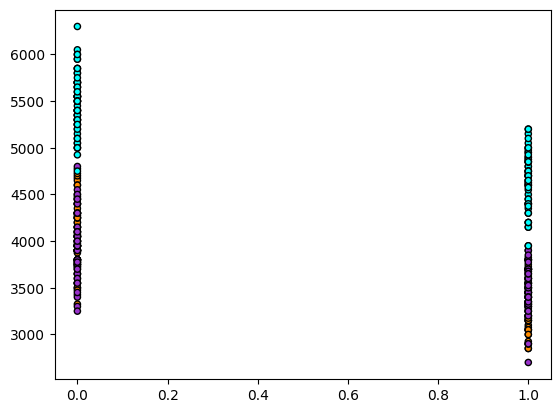

[[25  8  5]
 [ 1  5  0]
 [ 3  1 19]]
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.36      0.83      0.50         6
           2       0.79      0.83      0.81        23

    accuracy                           0.73        67
   macro avg       0.67      0.77      0.68        67
weighted avg       0.79      0.73      0.75        67



In [352]:
X_train, X_test, y_train, y_test = train_test_split(X[:,:-1], y, test_size=0.2, random_state=1333)
print(X_train)
# 3. Design a model
k = 5

clf = KNN(k=k)

# 4. Train a model
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)

# 6. Evaluate predictions
print("KNN classification accuracy", accuracy(y_test, y_pred))
#print(X[:,4])
plt.figure()
plt.scatter(X[:,4],X[:,3],c=y, cmap=cmap, edgecolors='k', s=20 )
#plt.legend("darkorange")
plt.show()

X_train.shape
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

## Discuss the results

